In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('../Datasets/test/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
df1=df.reset_index()['Close']
df1.head()

0    1.592667
1    1.588667
2    1.464000
3    1.280000
4    1.074000
Name: Close, dtype: float64

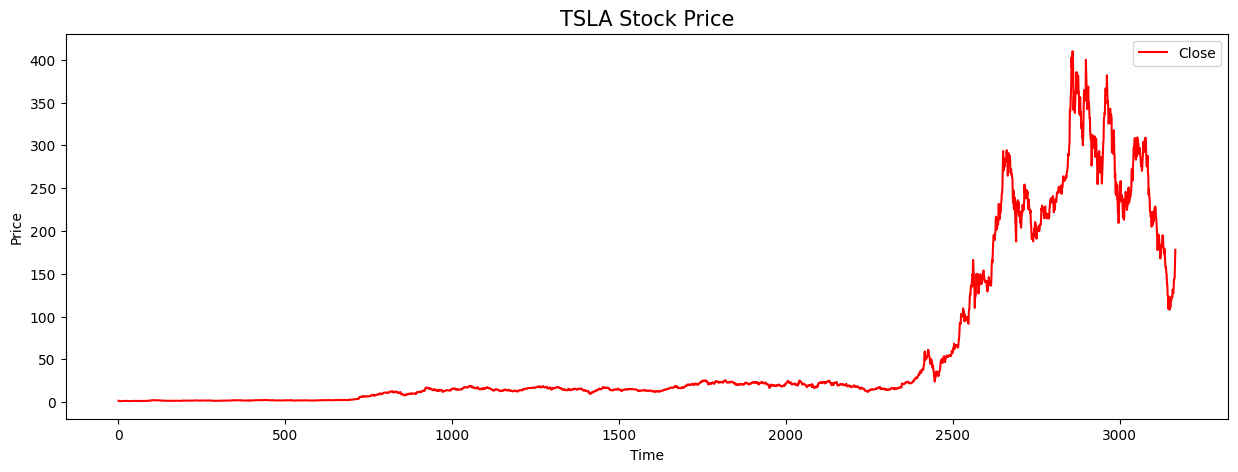

In [4]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.title('TSLA Stock Price', fontsize=15)
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()

plt.show()

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
def create_dataset(dataset, time_step=50):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
X_train =X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [9]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M2


In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


2023-04-13 21:43:54.445395: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


62/62 [==============================] - 6s 58ms/step - loss: 9.1794e-05 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 9.9206e-04
Epoch 2/50
62/62 [==============================] - 2s 37ms/step - loss: 7.7570e-06 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 9.9206e-04
Epoch 3/50
62/62 [==============================] - 2s 37ms/step - loss: 7.9187e-06 - accuracy: 0.0000e+00 - val_loss: 0.0095 - val_accuracy: 9.9206e-04
Epoch 4/50
62/62 [==============================] - 2s 38ms/step - loss: 6.8724e-06 - accuracy: 0.0000e+00 - val_loss: 0.0072 - val_accuracy: 9.9206e-04
Epoch 5/50
62/62 [==============================] - 2s 38ms/step - loss: 6.7527e-06 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 9.9206e-04
Epoch 6/50
62/62 [==============================] - 2s 38ms/step - loss: 7.0366e-06 - accuracy: 0.0000e+00 - val_loss: 0.0083 - val_accuracy: 9.9206e-04
Epoch 7/50
62/62 [==============================] - 2s 36ms/step - loss: 7.8384e-06 - accurac

KeyboardInterrupt: 

# WASTED
## I can tell I must not be the problem.